In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/healthcare-dataset/healthcare_dataset.csv


In [2]:
# Load the data set using pandas read csv function
data = pd.read_csv(os.path.join(dirname, filename))
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [3]:
# Check data shape
data.shape

(10000, 15)

In [4]:
# Check data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [5]:
# Check null values
100 * data.isna().sum()/len(data)

Name                  0.0
Age                   0.0
Gender                0.0
Blood Type            0.0
Medical Condition     0.0
Date of Admission     0.0
Doctor                0.0
Hospital              0.0
Insurance Provider    0.0
Billing Amount        0.0
Room Number           0.0
Admission Type        0.0
Discharge Date        0.0
Medication            0.0
Test Results          0.0
dtype: float64

In [6]:
# Check duplicate values
data.duplicated().sum()

0

In [7]:
# Check some data statistical information
data.describe().style.background_gradient(cmap='RdYlBu')

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


# Observations #

* The data contains 10k rows and 15 features.
* There is neither null nor duplicate values in the dataset.
* Minimum and maximum values in the age column are 18 and 85.

# Exploratory Data Analysis #

* Generate a pie chart to represent the percentage distribution of each blood group in the dataset.
* Generate a bar chart to highlight the top 10 regular customers based on relevant criteria in the dataset.
* Generate a bar chart to identify and visualize the busiest doctor within the dataset.
* Generate a pie chart to illustrate the percentage distribution of genders in the dataset.
* Create a visualization to represent the distribution of age values in the dataset.

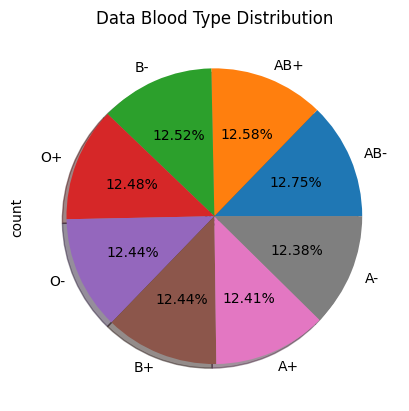

In [8]:
# Visualize the blood type distribution
data['Blood Type'].value_counts().sort_values(ascending=False).plot(kind='pie',
      title='Data Blood Type Distribution',
#      colors=[],
      autopct='%1.2f%%',
      pctdistance=0.6,
      shadow=True)

plt.show()

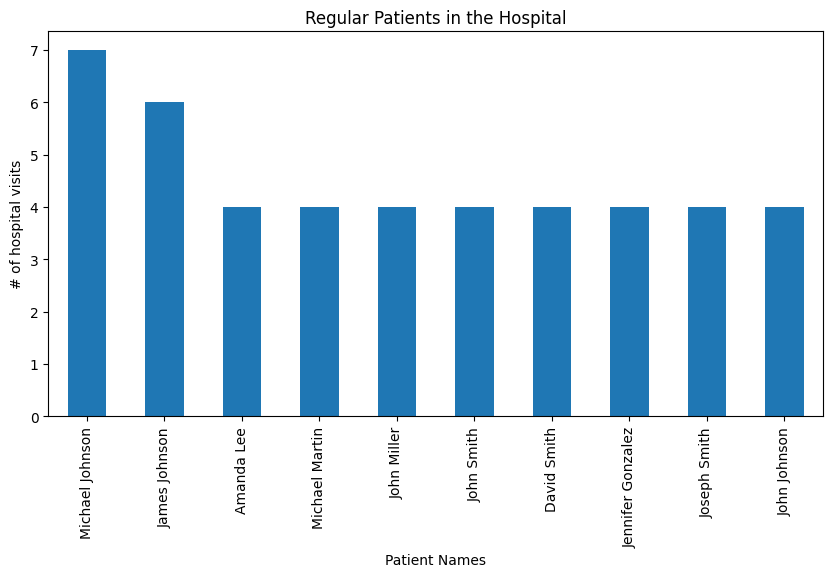

In [9]:
# Visualize the regular customers
data['Name'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar',
                                                                       figsize=(10,5),
                                                                       title='Regular Patients in the Hospital')
plt.xlabel('Patient Names'),
plt.ylabel('# of hospital visits')

plt.show()

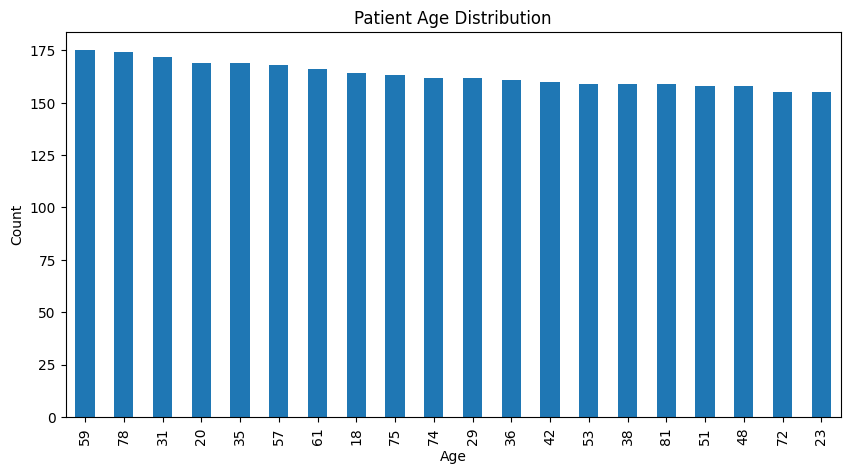

In [10]:
# Check the age distribution of the data
data['Age'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar',
                                                                       figsize=(10,5),
                                                                       title='Patient Age Distribution')
plt.xlabel('Age'),
plt.ylabel('Count')

plt.show()

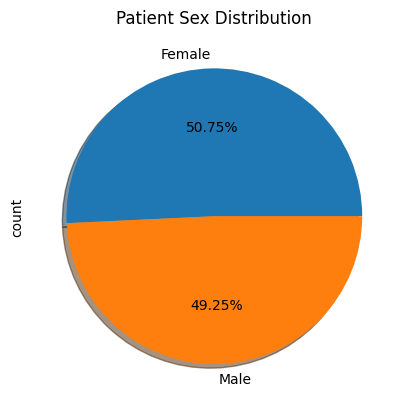

In [11]:
# Visualize sex distribution
data['Gender'].value_counts().sort_values(ascending=False).plot(kind='pie',
      title='Patient Sex Distribution',
#      colors=[],
      autopct='%1.2f%%',
      pctdistance=0.6,
      shadow=True)

plt.show()

# Observations #

* Blood group distribution is almost equal at 12% although AB- leads with 12.75% followed by AB+ with 12.58%.
* The two patients with the highest hospital visits are Michael Johnson and James Johnson with total visits of 7 and 6, respectively .
* Ages 59 and 78 are the highest number of hospital visits although the trend is gradually declining.
* There is almost 50/50 split between female and male patients.

# Additional Exploratory Data Analysis #

* Visualize the medications used for each of the medical conditions.
* Visualize a time series showing the number of patients each day.
* Identify the 10 hospitals with the highest charges paid by patients.
* Visualize the top 10 costly doctors. 
* Visualize the relationship between medical conditions and admission types.

In [12]:
# Visualize the medications used for each medical condition.
data.groupby('Medical Condition')['Medication'].value_counts().sort_values(ascending=False)\
.unstack().style.background_gradient(cmap='GnBu_r')

Medication,Aspirin,Ibuprofen,Lipitor,Paracetamol,Penicillin
Medical Condition,,,,,
Arthritis,322,320,318,324,366
Asthma,370,340,346,310,342
Cancer,291,352,350,346,364
Diabetes,335,301,326,327,334
Hypertension,328,335,356,323,346
Obesity,322,328,319,332,327


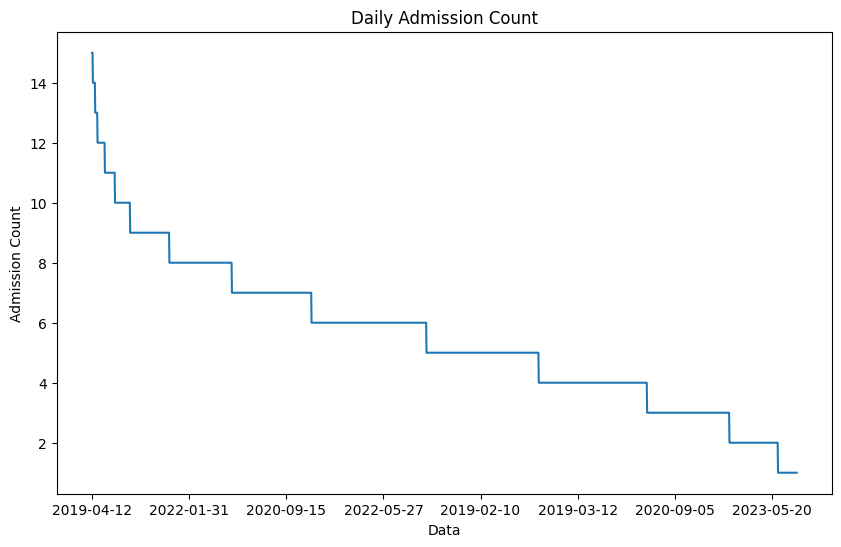

In [13]:
data['Date of Admission'].value_counts().plot(kind='line',
                                             figsize=(10,6),
                                             title='Daily Admission Count')
plt.xlabel('Data')
plt.ylabel('Admission Count')
plt.show()

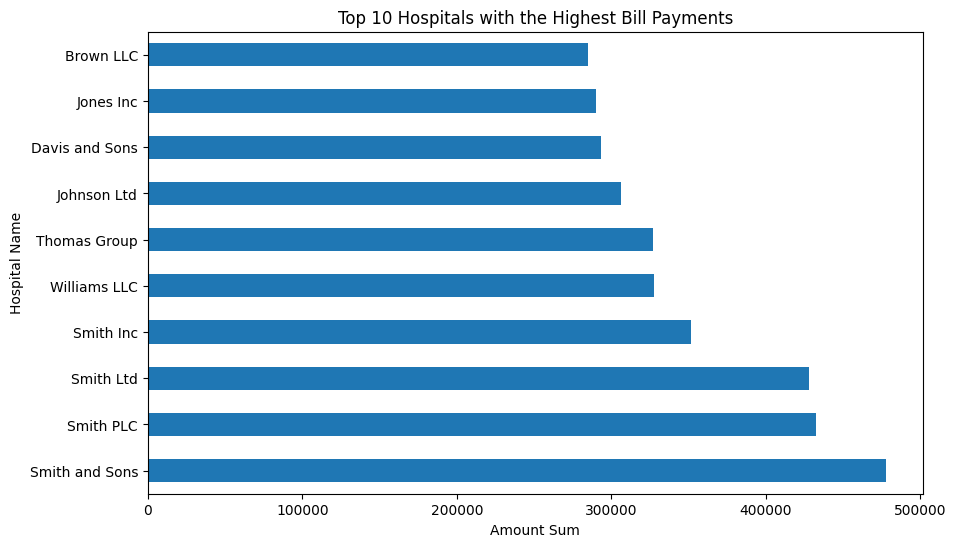

In [14]:
# Top 10 hospitals with the highest fees
data.groupby('Hospital')['Billing Amount'].sum().sort_values(ascending=False).head(10)\
.plot(kind='barh',
      figsize=(10,6))
plt.title('Top 10 Hospitals with the Highest Bill Payments')
plt.ylabel('Hospital Name')
plt.xlabel('Amount Sum')
plt.show()

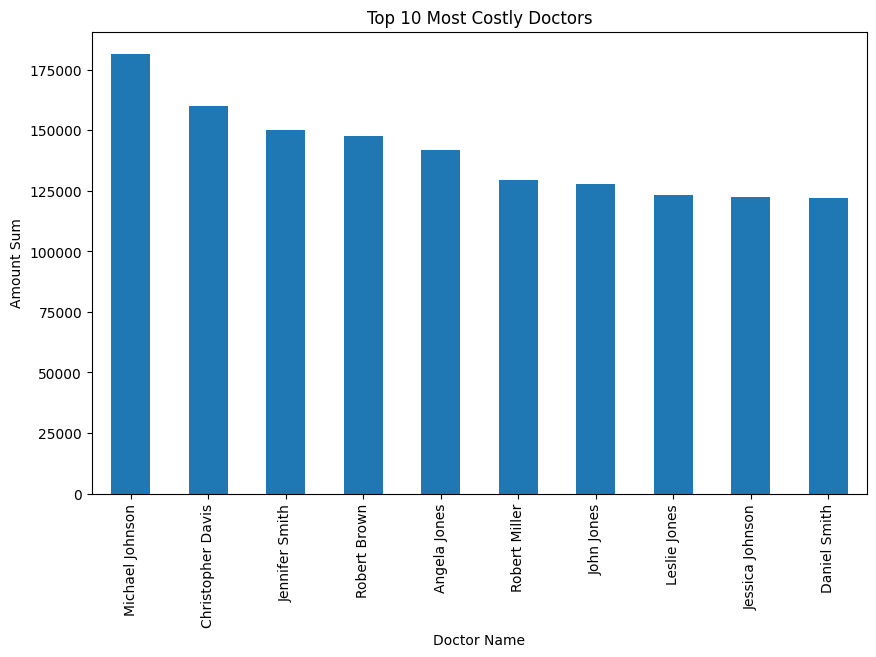

In [15]:
# Top 10 most costly doctors
data.groupby('Doctor')['Billing Amount'].sum().sort_values(ascending=False).head(10)\
.plot(kind='bar',
      figsize=(10,6))
plt.title('Top 10 Most Costly Doctors')
plt.xlabel('Doctor Name')
plt.ylabel('Amount Sum')
plt.show()

In [16]:
# Visualize the relationship between medical conditions and admission types.
data.groupby('Medical Condition')['Admission Type'].value_counts()\
.unstack().style.background_gradient(cmap='seismic_r')

Admission Type,Elective,Emergency,Urgent
Medical Condition,,,
Arthritis,569,529,552
Asthma,570,556,582
Cancer,555,578,570
Diabetes,528,557,538
Hypertension,515,578,595
Obesity,505,569,554


# Observations #

* Penicillin medication is widely used to medicate patients with arthritis and cancer while aspirin medication is widely used to medicate patients with asthma.  
* The dates with the highest admission count were 12 April 2019 and 27 April 2022 at 15 patients.
* Smith andSons hospital has the highest charge amount during the observed period. 
* Michael Johnson is the highest-earning doctor.
* Majority of patients with either hypertension or cancer are admitted as either Urgent or Emergency. On the other hand, majority of patients with arthritis are admitted as elective. 

In [17]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [20]:
# Get the average amount for each sex.
pd.DataFrame(data.groupby('Gender')['Billing Amount'].mean().sort_values(ascending=False))

,Billing Amount
Gender,
Male,25550.215933
Female,25484.385085


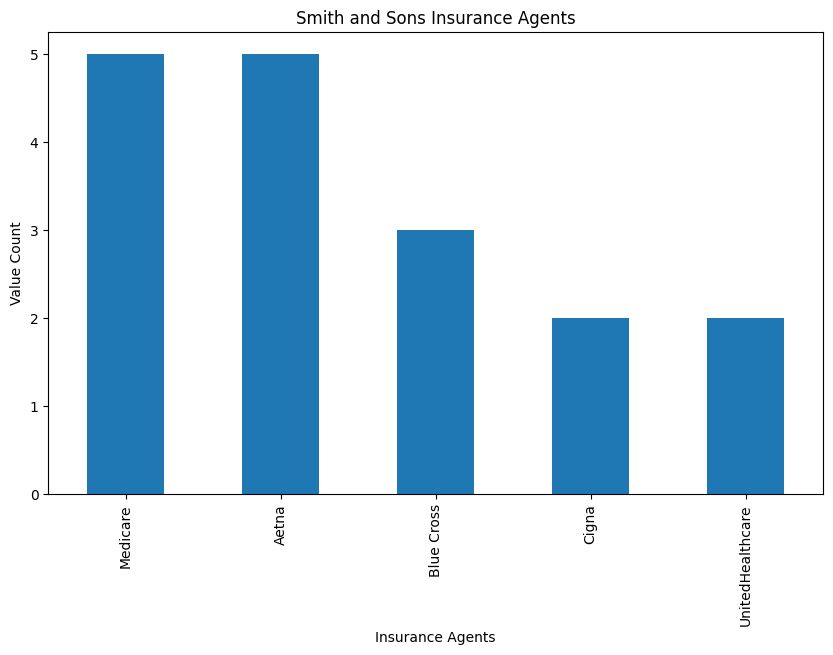

In [21]:
# Find the Smith and Sons hospital insurance providers
data.groupby('Hospital')['Insurance Provider'].value_counts().loc['Smith and Sons']\
.plot(kind='bar',
      figsize=(10,6))
plt.title('Smith and Sons Insurance Agents')
plt.xlabel('Insurance Agents')
plt.ylabel('Value Count')
plt.show()

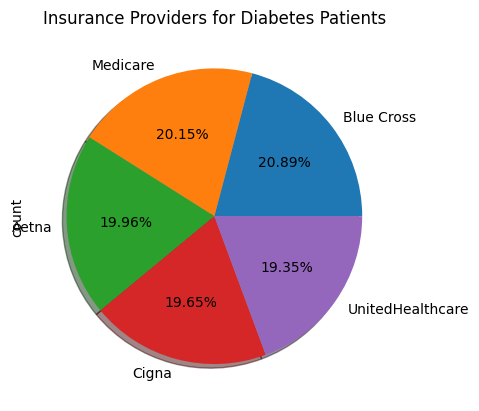

In [23]:
# Find which insurance providers are providing insurance for diabetes patients
diabetes = data['Medical Condition']=='Diabetes'
data.loc[diabetes]['Insurance Provider'].value_counts()\
.plot(kind='pie',
     title='Insurance Providers for Diabetes Patients',
     autopct='%1.2f%%',
     shadow=True)
plt.show()

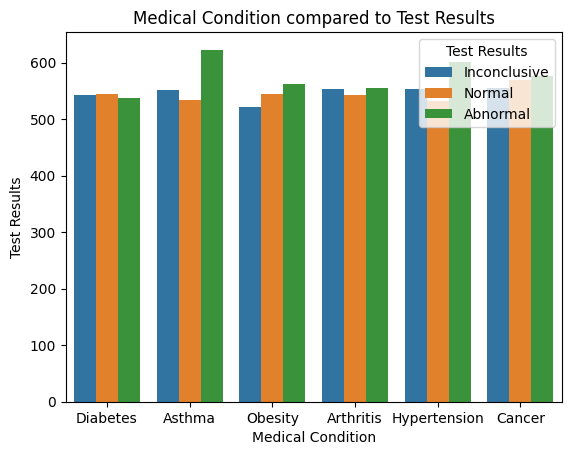

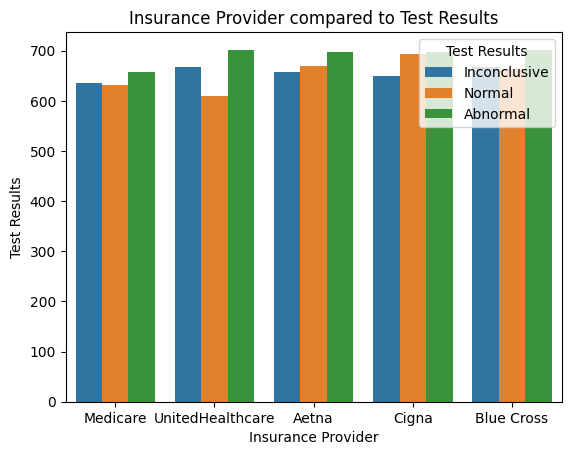

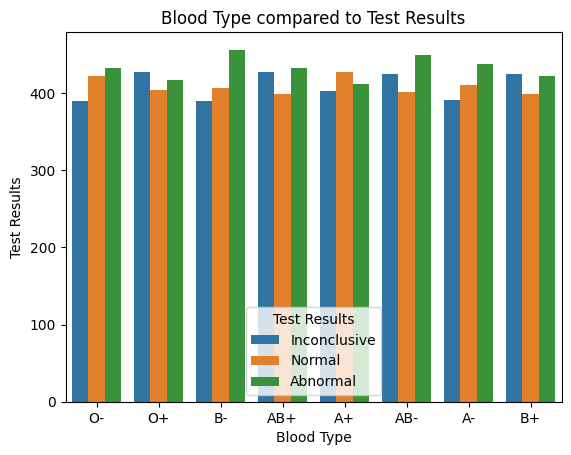

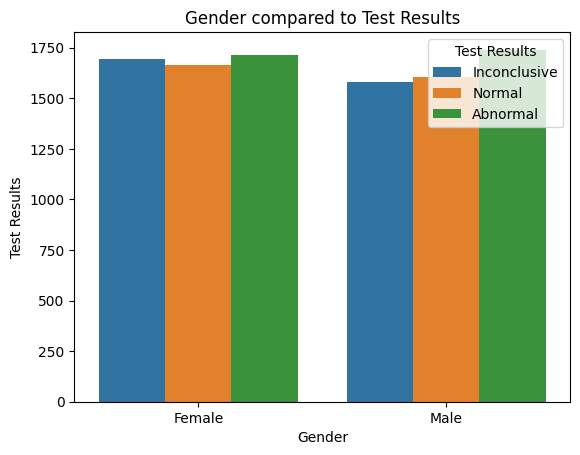

In [28]:
# Compare medical condition, insurance provider, blood type and gender to test results
for i in ['Medical Condition','Insurance Provider','Blood Type','Gender']:
    sns.countplot(data=data,x=i,hue='Test Results',palette='tab10')
    plt.title(f'{i} compared to Test Results')
    plt.xlabel(f'{i}')
    plt.ylabel('Test Results')
    plt.show()

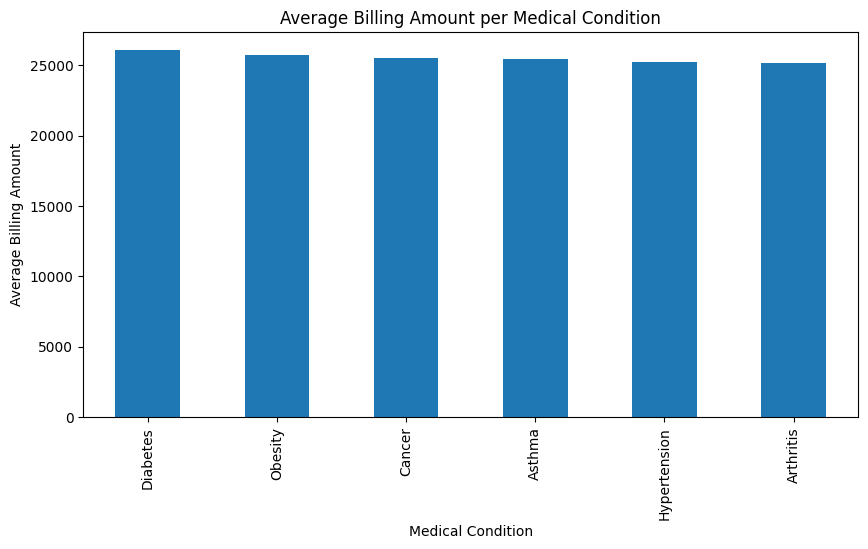

In [30]:
# Visualize the average billing amount for each medical condition
data.groupby('Medical Condition')['Billing Amount'].mean().sort_values(ascending=False)\
.plot(kind='bar', title='Average Billing Amount per Medical Condition', figsize=(10,5))
plt.xlabel('Medical Condition')
plt.ylabel('Average Billing Amount')
plt.
plt.show()